In [1]:
def generate_colab_link(username, repo, branch, notebook_path):
    # Substitui espaços por %20
    notebook_path_encoded = notebook_path.replace(" ", "%20")
    return f"https://colab.research.google.com/github/{username}/{repo}/blob/{branch}/{notebook_path_encoded}"

# Exemplo de uso
username = "gutosantos-github"
repo = "amsaude"
branch = "master"
notebook_path = "/4-atividade-3/atividade_3_AM_na_saude_Augusto_Santos.ipynb"

link = generate_colab_link(username, repo, branch, notebook_path)
print(f"<a href='{link}' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>")

<a href='https://colab.research.google.com/github/gutosantos-github/amsaude/blob/master//4-atividade-3/atividade_3_AM_na_saude_Augusto_Santos.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>


<a href='https://colab.research.google.com/github/gutosantos-github/amsaude/blob/master//4-atividade-3/atividade_3_AM_na_saude_Augusto_Santos.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>


# TAREFA 3

# Breast Cancer Wisconsin (Diagnostic) Dataset - UCI Machine Learning Repository



Este dataset contém 569 instâncias e 30 atributos numéricos que descrevem características extraídas de imagens digitalizadas de exames de tumores mamários. Esses atributos incluem:

- Radius: Média do raio (distância do centro aos pontos do perímetro)
- Texture: Desvio padrão dos valores de cinza da superfície celular
- Perimeter: Perímetro médio
- Area: Área média
- Smoothness: Variação local nos comprimentos dos raios
- Compactness: (Perímetro² / Área - 1.0)
- Concavity: Severidade das concavidades na superfície celular
- Concave points: Número de pontos côncavos no contorno
Symmetry: Simetria da célula
- Fractal dimension: Dimensão fractal ("aproximação" da irregularidade)

##  O objetivo será agrupar as instâncias com base nas características celulares para encontrar padrões entre diferentes tipos de tumores.

Link para o dataset: Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
!pip install --upgrade kneed

In [ ]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Define o tamanho padrão para todas as figuras
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (8, 6)

import plotly.express as px

import io, os

#Fit the model for outlier detection (default)
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from kneed import KneeLocator

from sklearn.decomposition import PCA

from google.colab import drive

In [ ]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Metodologia

## Aplicar o algoritmo de K-Means para identificar padrões e similaridades entre tumores mamários a partir das características celulares fornecidas no dataset. O objetivo será agrupar os dados e explorar se os clusters resultantes correspondem a padrões de benignidade ou malignidade dos tumores.



# 1. Coleta e preparação de dados:
## 1.1) Carregar e explorar o dataset para compreender as variáveis e o formato dos dados.
## 1.2)Realizar o pré-processamento necessário, como normalização e tratamento de valores ausentes.

# 1.1) Carregar e explorar o dataset para compreender as variáveis e o formato dos dados.

In [ ]:
# Definir os nomes das colunas
column_names = ['id', 'diagnosis',
                'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
                'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
                'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024-2/4 - AM_na_saude/breast/wdbc.data', header=None, names=column_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,unammed
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## Já é possível verificar que não existem dados faltantes ou nulos no dataset

In [ ]:
df.shape[0]

569

In [ ]:
print(f'Número de instâncias (cardinalidade): {df.shape[0]}')
print(f'Número de colunas (atributos): {df.shape[1]}')
df.describe().T

Número de instâncias (cardinalidade): 569
Número de colunas (atributos): 32


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análise dos Dados

 ## Pré-processamento de Dados: A coluna "diagnóstico" tem dois valores: Maligno e Benigno. Por isso, será subsituído:
   
*   Maligno pelo número 1
*   Benigno pelo número 0



In [ ]:
df['diagnosis'] = df['diagnosis'].map(lambda f: 1 if f == 'M' else 0)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


# Análise dos Dados

## Verificação de valores únicos

In [ ]:
print('Quantidade de valores únicos por coluna (atributo):')
df.nunique()

Quantidade de valores únicos por coluna (atributo):


,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave_points_mean,542


# Gráfico de Barras para Distruibuição de dados entre Malignos e benignos

In [ ]:
# Agrupa e conta valores de 'id' por 'diagnosis'
df_counts = df.groupby('diagnosis')['id'].count().reset_index()

# Renomeia a coluna para melhor entendimento (opcional)
df_counts.columns = ['diagnosis', 'count']

In [ ]:
df_counts

,diagnosis,count
0,0,357
1,1,212


Text(0.5, 1.0, 'Distribuição dos dados entre Maligno(1) e Benigno(0)')

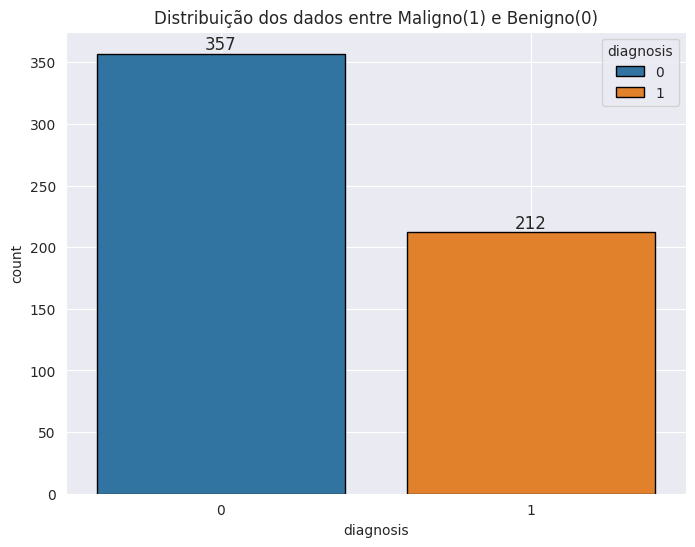

In [ ]:
sns.set_style("darkgrid")

ax = sns.barplot(
    data=df_counts,
    x='diagnosis',
    y='count',
    hue='diagnosis',
    edgecolor='black'
)
ax.grid(True)


# Adiciona rótulos às barras
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

# Define o título
ax.set_title('Distribuição dos dados entre Maligno(1) e Benigno(0)')
# plt.show()

## Matriz de Correlação Diagonal: Para estes dados, será utilizada a implementação da matriz de correlação do sklearn, que utiliza o Coeficiente de Correlação de Pearson como padrão.

In [ ]:
df_corr = df.drop(columns=['id', 'diagnosis'], axis=1)

In [ ]:
corr_matrix = df_corr.corr()


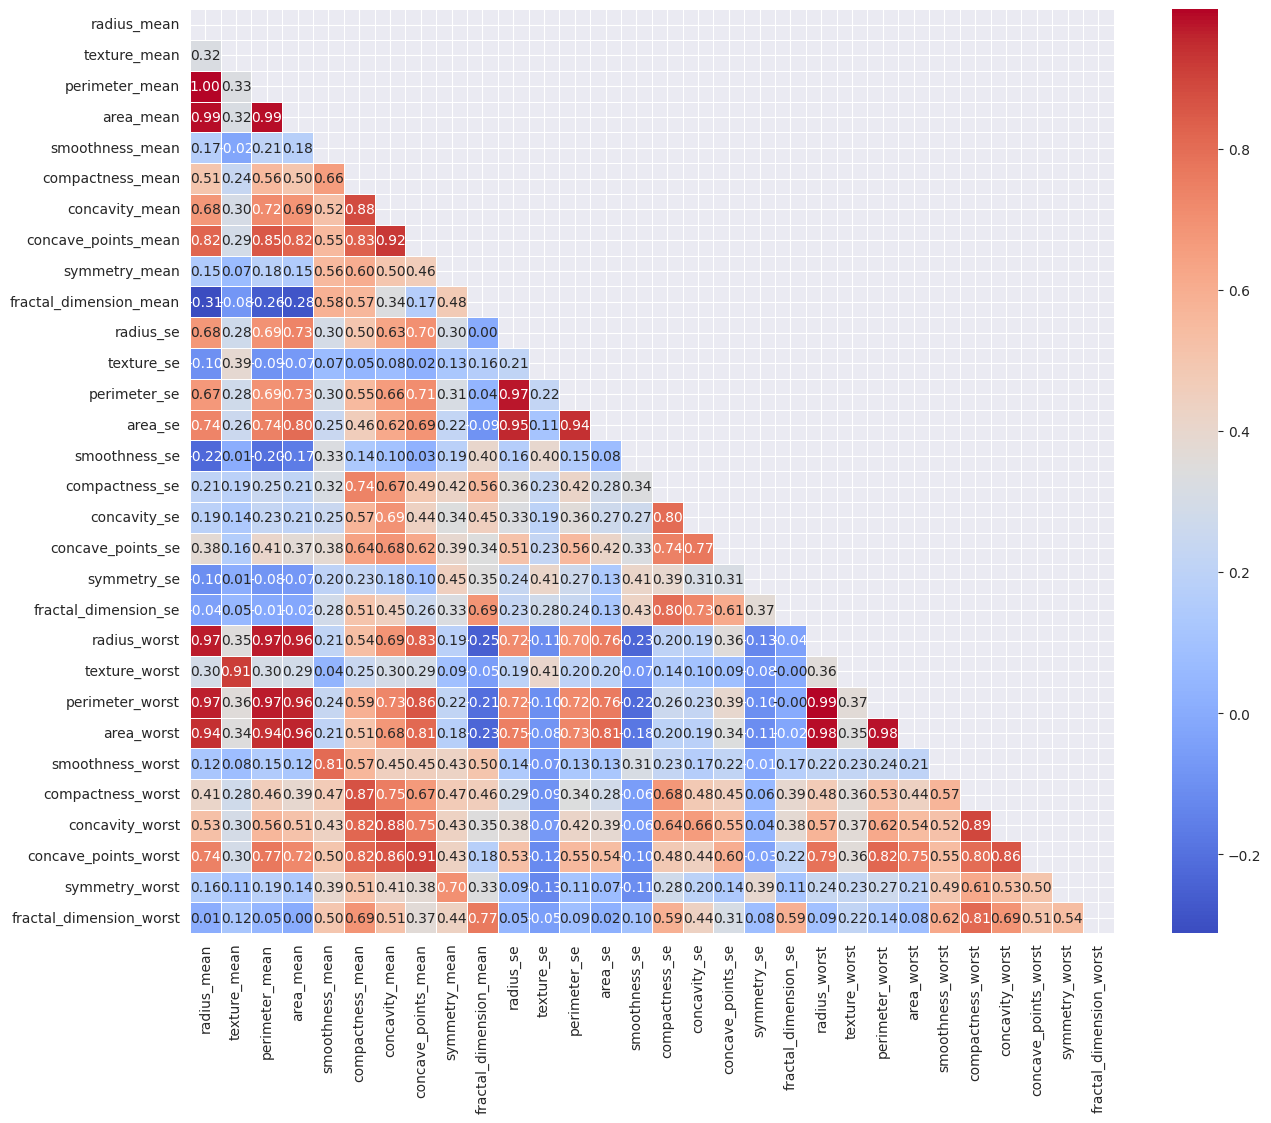

In [ ]:
plt.figure(figsize=(15, 12))
# corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt="0.2f",
            cmap='coolwarm',
            square=True)
plt.show()

## Observações:

## Raio, Área e Perímetro estão correlacionados (corr>0,9), pois a área e o perímetro são calculados usando os valores do raio.

## Texture_mean e texture_worst estão altamente correlacionados com corr_value = 0,91 (texture_worst é o maior valor de todas as texturas).

## Compactness_mean, concavity_mean, concave_points_mean também estão altamente correlacionados com valores na faixa de 0,7 a 0,9.

## Symmetry_mean e symmetry_worst também estão correlacionados por valores de 0,7.

## Fractal_dimension_mean e fractal_dimension_worst estão correlacionados pelo valor 0,77.

#Observações mais profundas:

## Pairplots: Gráficos que permitem ver tanto a distribuição de variáveis individuais quanto a relação entre um par de variáveis do conjunto dado de variáveis/características na forma de uma matriz.

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df_pairplot = df.drop(columns=['id'], axis=1)

In [ ]:
# Filtra itens que contêm a substring "_mean"
cols_mean = [item for item in df.columns if "_mean" in item]

In [ ]:
cols_mean = ['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
df_cols_mean = pd.DataFrame(df, columns=cols_mean)

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(
    df_cols_mean,
    hue='diagnosis',
    diag_kind="kde",
    palette = ["blue","darkorange"]
)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Observações:

- Uma das principais conclusões a partir desses gráficos é observar que há um certo nível de separação entre os tipos de dados malignos e benignos. Essa separação pode ser de extrema utilidade para usar essas características na concepção de um algoritmo de aprendizado de máquina. Principalmente algoritmos que levam em consideração clusters e distâncias entre pontos de dados. Além disso é muito mais fácil visualizar as correlações positivas e negativas pela perspectiva limitada que é humana no que concerne a visualização.

#Box Plots and Violin Plots:

* Box Plot: Um box plot fornece informações sobre a variabilidade e dispersão dos dados na forma de uma caixa. A linha do meio representa o valor mediano e os primeiros e terceiros quartis nas extremidades. O Mínimo e o Máximo são representados por linhas de cada lado da caixa.
* Gráficos de Violino: Os Gráficos de Violino têm a vantagem de combinar esses dados com seus gráficos de densidade, permitindo-nos ver a totalidade da distribuição dos dados em um único gráfico

## Ambos também ajudam na interpretação dos resultados de um determinado algoritmo.



In [ ]:
# Filtra itens que contêm a substring "_radius"
cols_radius = [item for item in df.columns if "radius" in item or item == "diagnosis"]
df_cols_radius = pd.DataFrame(df, columns=cols_radius)

# Filtra itens que contêm a substring "paerimeter"
cols_perimeter = [item for item in df.columns if "perimeter" in item or item == "diagnosis"]
df_cols_perimeter = pd.DataFrame(df, columns=cols_perimeter)

# Filtra itens que contêm a substring "area"
cols_area = [item for item in df.columns if "area" in item or item == "diagnosis"]
df_cols_area = pd.DataFrame(df, columns=cols_area)

# Filtra itens que contêm a substring "texture"
cols_texture = [item for item in df.columns if "texture" in item or item == "diagnosis"]
df_cols_texture = pd.DataFrame(df, columns=cols_texture)


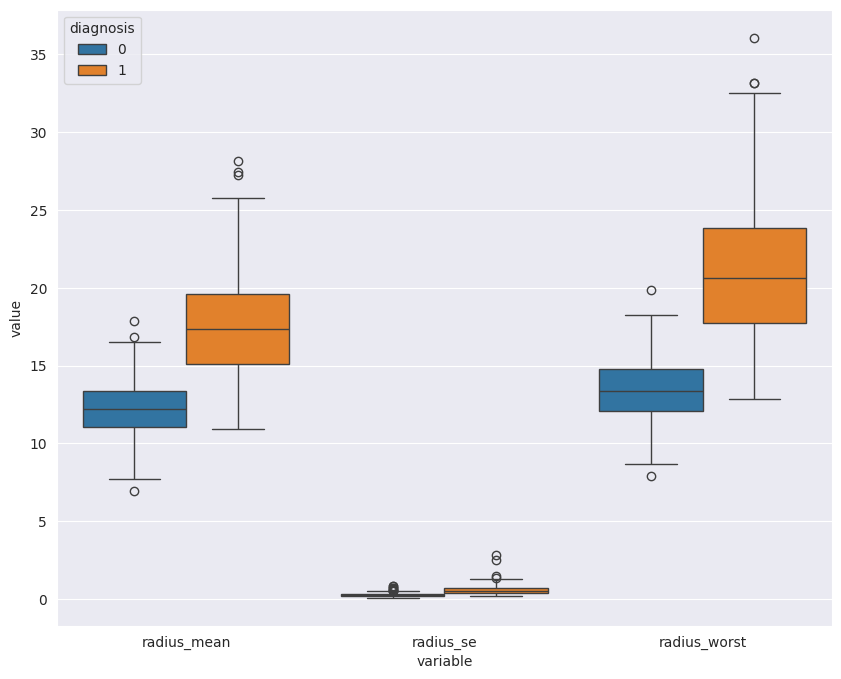

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,
            y = "value",
            hue= "diagnosis",
            data=pd.melt(df_cols_radius,
                         id_vars='diagnosis'))
plt.show()

<ipython-input-45-d0fe7e1bbc48>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable",


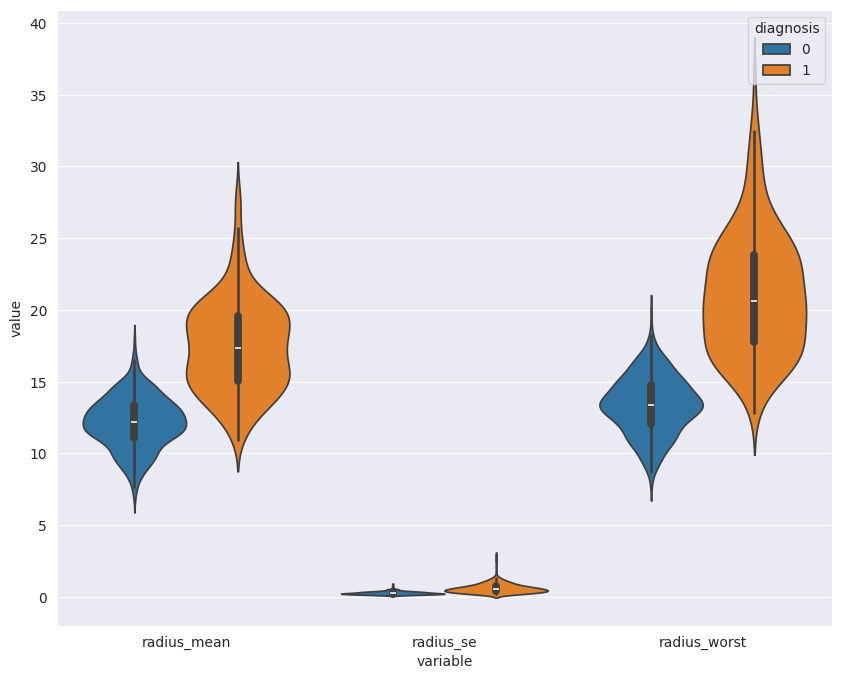

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable",
               y = "value",
               hue= "diagnosis",
               data=pd.melt(df_cols_radius, id_vars='diagnosis'),
               scale="width")
plt.show()

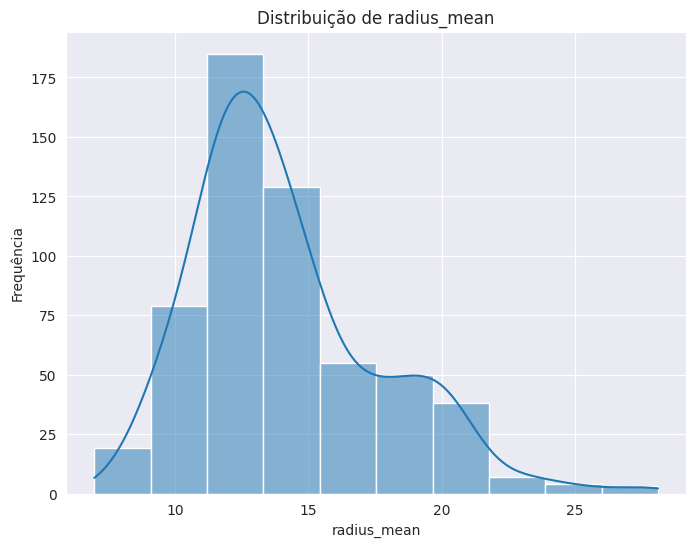

In [ ]:
# Adiciona `kde=True` para a curva de densidade
sns.histplot(data=df,
             x='radius_mean',
             bins=10,
             kde=True)

plt.title('Distribuição de radius_mean')
plt.xlabel('radius_mean')
plt.ylabel('Frequência')
plt.show()

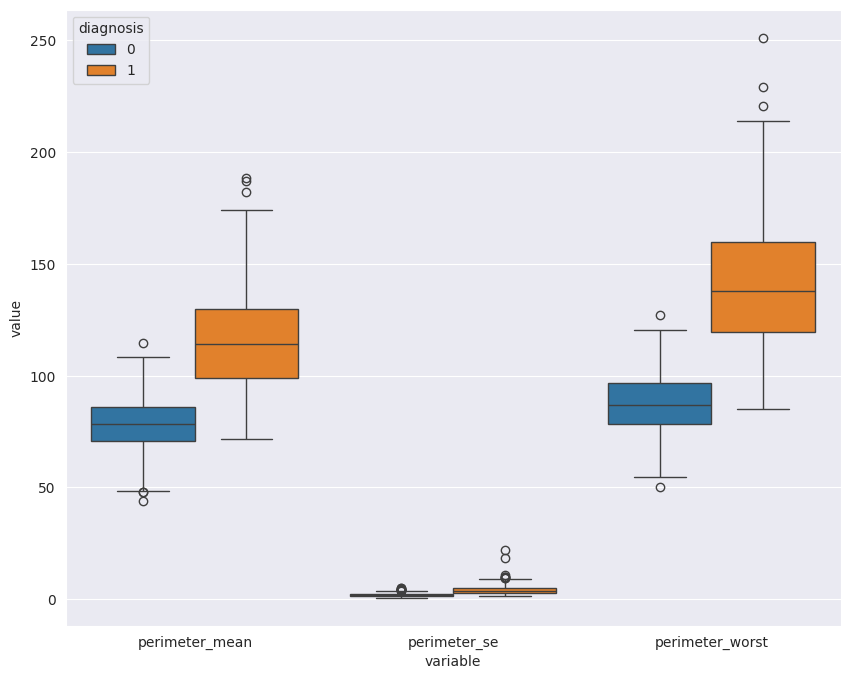

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,
            y = "value",
            hue= "diagnosis",
            data=pd.melt(df_cols_perimeter,
                         id_vars='diagnosis'))
plt.show()


<ipython-input-48-dc748f6b9c24>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable" ,


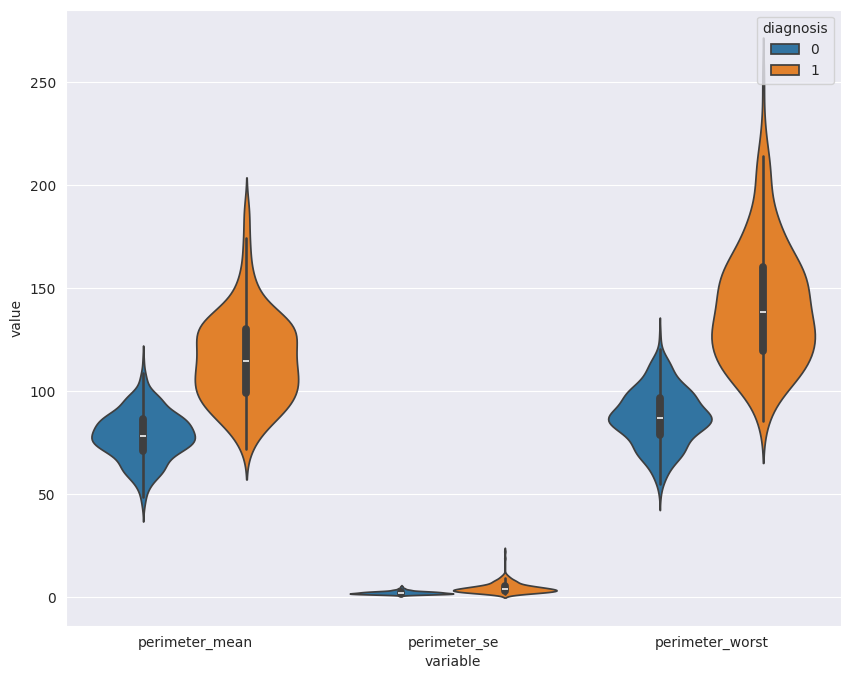

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable" ,
               y = "value",
               hue= "diagnosis",
               data=pd.melt(df_cols_perimeter, id_vars='diagnosis'),
               scale="width")
plt.show()

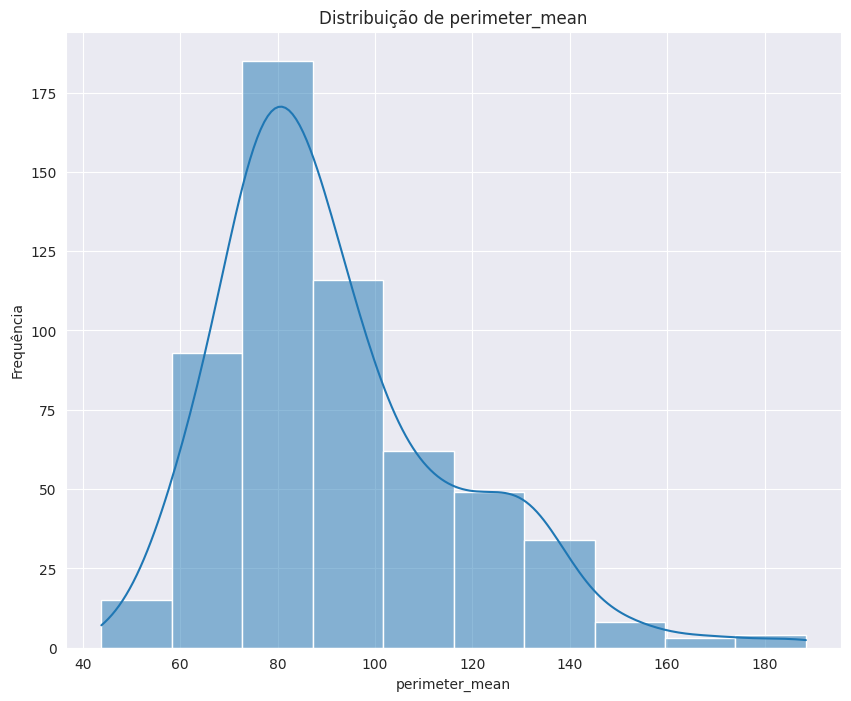

In [ ]:
# Adiciona `kde=True` para a curva de densidade
plt.figure(figsize=(10, 8))
sns.histplot(data=df,
             x='perimeter_mean',
             bins=10,
             kde=True)  # Adiciona `kde=True` para a curva de densidade

plt.title('Distribuição de perimeter_mean')
plt.xlabel('perimeter_mean')
plt.ylabel('Frequência')
plt.show()


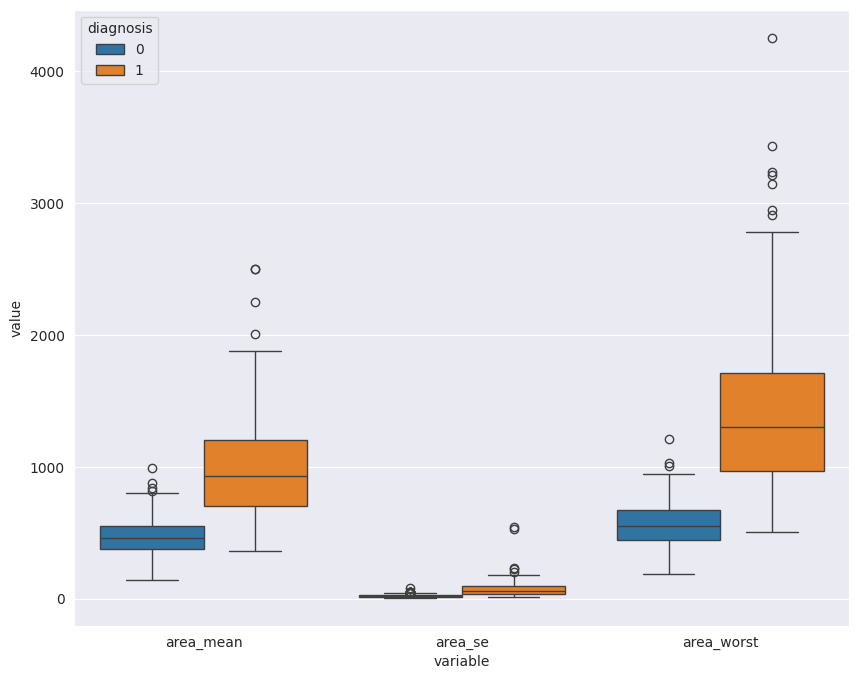

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,
            y = "value",
            hue= "diagnosis",
            data=pd.melt(df_cols_area,
                         id_vars='diagnosis'))
plt.show()

<ipython-input-51-02479161cbc0>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable" ,


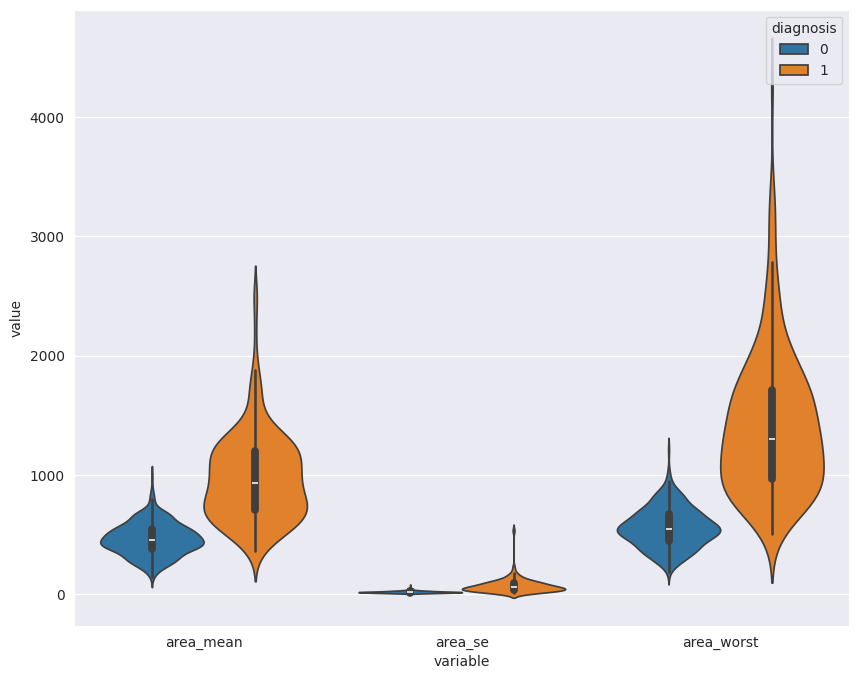

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable" ,
               y = "value",
               hue= "diagnosis",
               data=pd.melt(df_cols_area, id_vars='diagnosis'),
               scale="width")
plt.show()

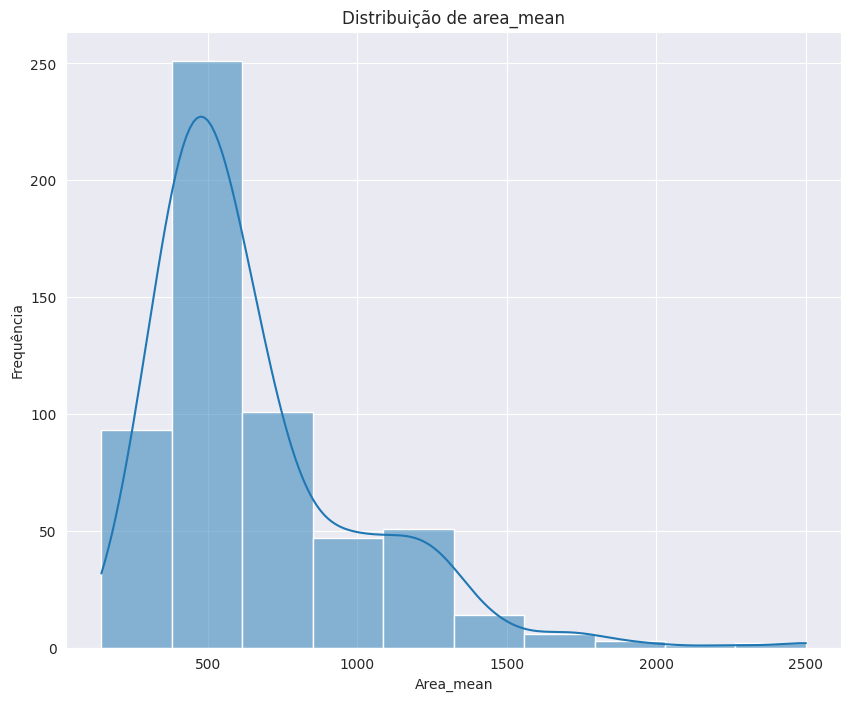

In [ ]:
# Adiciona `kde=True` para a curva de densidade
plt.figure(figsize=(10, 8))
sns.histplot(data=df,
             x='area_mean',
             bins=10,
             kde=True)  # Adiciona `kde=True` para a curva de densidade

plt.title('Distribuição de area_mean')
plt.xlabel('Area_mean')
plt.ylabel('Frequência')
plt.show()

## Observações:

*   Ratifica-se o certo nível de separação nos valores do raio, perímetro e área nos pontos de dados benignos (diagnóstico = 0) e malignos (diagnóstico = 1) conforme observado no pairplot.
*  Cada uma das características parece ter valores discrepantes (outliers), conforme mostrado no boxplot, e portanto precisam ser tratadas durante o pré-processamento dos dados.
* A distribuição parece ser Gaussiana (Normal) com uma assimetria à direita (skewness positiva).

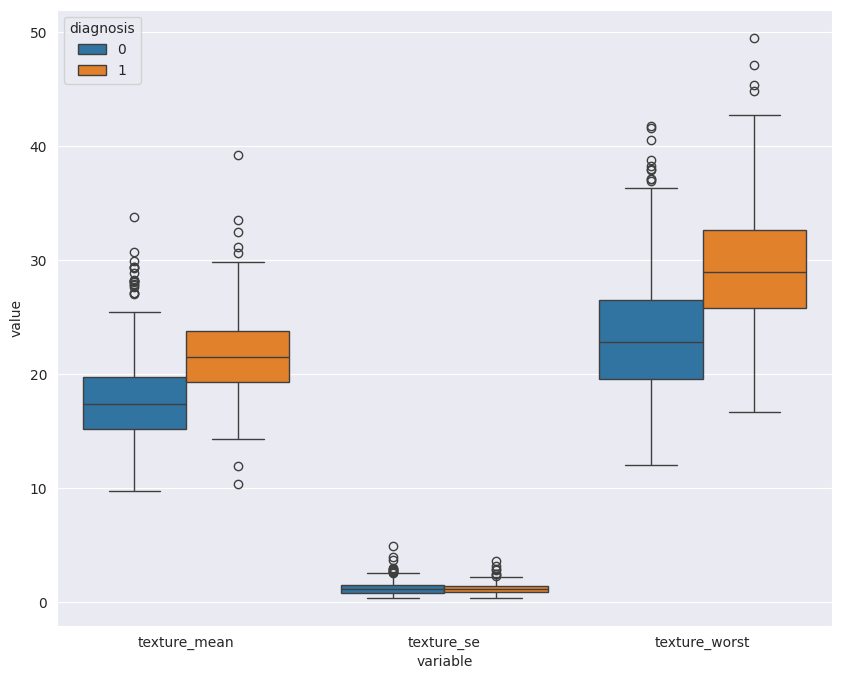

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "variable" ,
            y = "value",
            hue= "diagnosis",
            data=pd.melt(df_cols_texture,
            id_vars='diagnosis'))
sns.set_style("darkgrid")
plt.show()


<ipython-input-54-0ee0def2b9be>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= "variable",


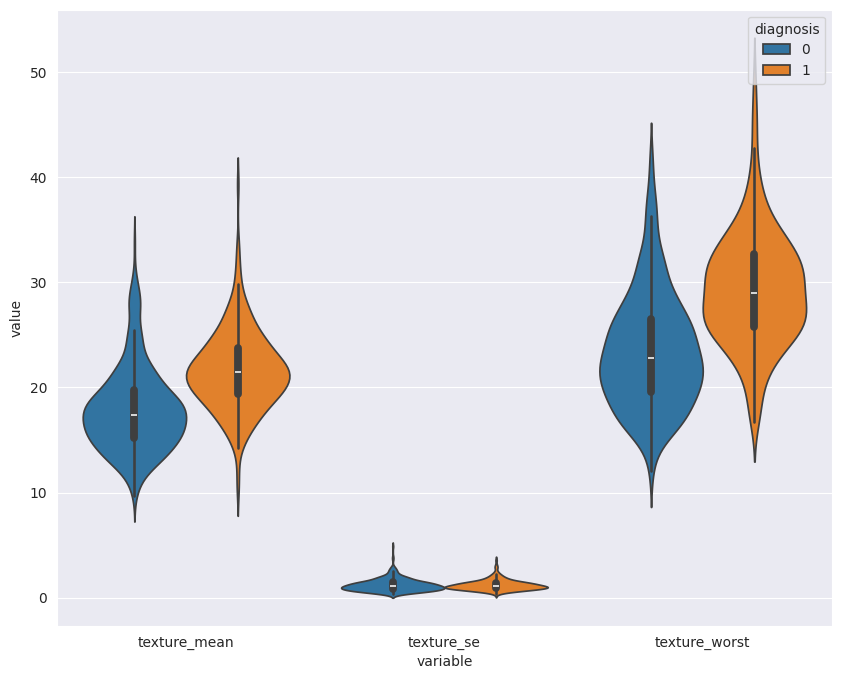

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x= "variable",
               y = "value",
               hue= "diagnosis",
               data=pd.melt(df_cols_texture, id_vars='diagnosis'),
               scale="width")
sns.set_style("darkgrid")
plt.show()

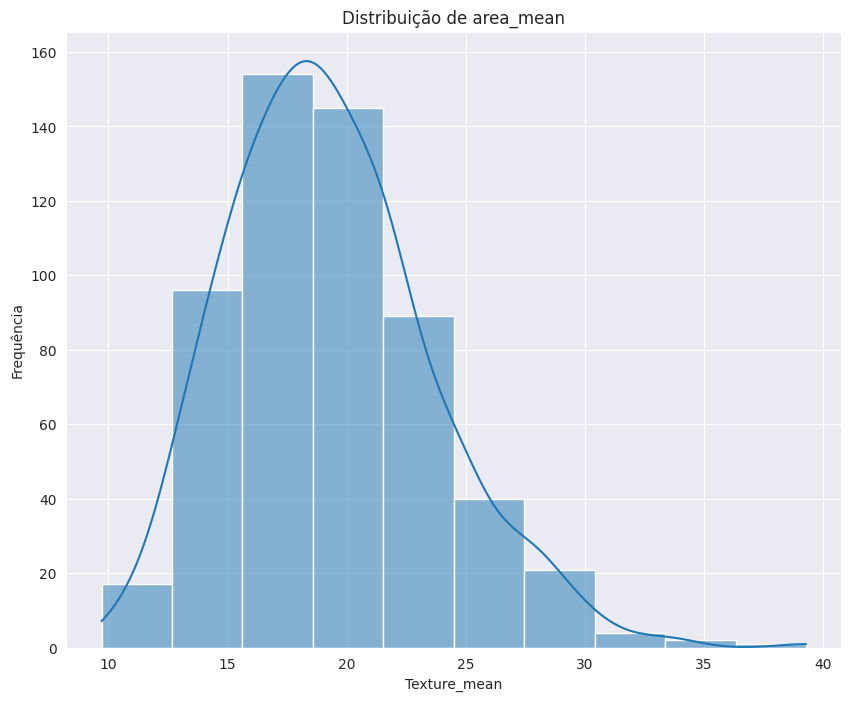

In [ ]:
# Adiciona `kde=True` para a curva de densidade
plt.figure(figsize=(10, 8))
sns.histplot(data=df,
             x='texture_mean',
             bins=10,
             kde=True)  # Adiciona `kde=True` para a curva de densidade
sns.set_style("darkgrid")
plt.title('Distribuição de area_mean')
plt.xlabel('Texture_mean')
plt.ylabel('Frequência')
plt.show()

# Observações:
- Os valores para Texture_se caem na mesma faixa tanto para pontos de dados malignos quanto benignos.
- Separação clara no texture_mean e texture_worst nos pontos de dados benignos e malignos
- Valores discrepantes percebidos nas três métricas
- Distribuição dos dados aparenta ser normal

# Aplicação do Algoritmo Kmeans executado SEM tratamento dos valores discrepantes (outliers)

#Normalização Min_Max

- Padronização dos dados é importante, principalmente no caso de visualização, uma vez que neste caso, no qual serão plotados clusters, precisa-se visualizar de forma que as escalas dos gráficos estejam dentro do intervalo necessário.

In [ ]:
y = df['diagnosis']
X = df.drop(columns=['diagnosis', 'id'] ,axis=1)

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
#Normaliza as variáveis independentes de treino e teste, escalando os valores para um intervalo definido (por padrão, entre 0 e 1)
scaler = MinMaxScaler()

#ajusta o scaler aos dados de treino, calculando o valor mínimo e o valor máximo de cada feature,
#e aplica a transformação para normalizar os dados dentro do intervalo especificado.
X_normalized = scaler.fit_transform(X)

## Agora X_normalized é a versão normalizada do dataset.

In [ ]:
X_normalized

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area_mean,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity_mean,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
concave_points_mean,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
fractal_dimension_mean,569.0,0.270379,0.148702,0.0,0.163016,0.243892,0.340354,1.0


# 2. Aplicação do K-Means:
## 2.1) Utilizar o algoritmo K-Means para agrupar os tumores com base nas características celulares.
## 2.2) Avaliar diferentes números de clusters (valores de K) e interpretar os resultados.

1.   O primeiro passo na clusterização k-means é encontrar o número ótimo de clusters:

Encontrar o número ideal de clusters só pode ser feito manualmente.
Neste caso, será utilizado o Método do Cotovelo para encontrar o número ideal de clusters.
O método do cotovelo usa a inércia ou a soma das distâncias ao quadrado e plota no gráfico, onde a inércia mínima é necessária.



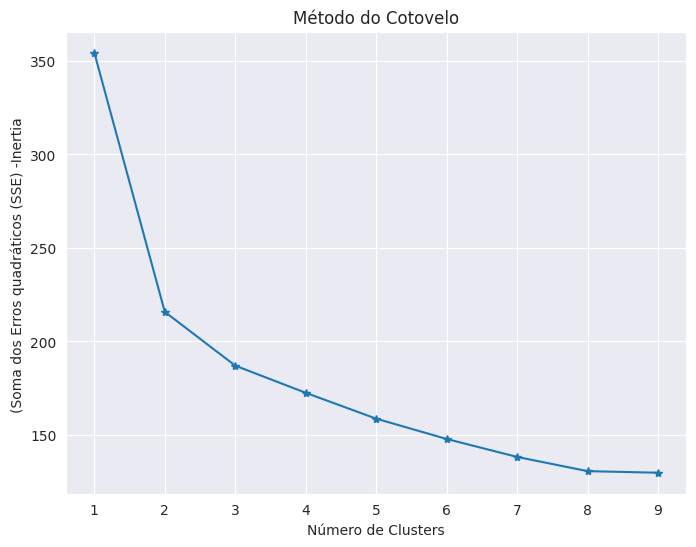

In [ ]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10),
         inertias,
         marker='*')

plt.xlabel('Número de Clusters')
plt.ylabel('(Soma dos Erros quadráticos (SSE) -Inertia ')
plt.title('Método do Cotovelo')
plt.show()

- Determinar o ponto de cotovelo na curva SSE (inertias)

In [ ]:
kl = KneeLocator(range(1, 10),
                 inertias,
                 curve="convex",
                 direction="decreasing")
kl.elbow

3

In [ ]:
print(f'Soma dos Erros Quadráticos para cada valor de k: ')
inertias

Soma dos Erros Quadráticos para cada valor de k: 


[354.43661334440105,
 215.83831972044837,
 187.05753108436846,
 172.5410140141763,
 158.71186438285224,
 147.84585617016,
 138.24782825371875,
 130.6409351877044,
 129.7912602363203]

# Kmeans k=2

- Aqui, o número ótimo de clusters é 3. Porém, primeiramente avaliar-se-á o valor de k em 2.

A partir deste gráfico, pode-se ver claramente que o ponto de junção do cotovelo está em 2. Então, será fixado o número de clusters em 2.




- init='k-means++': Este é um método de inicialização que ajuda a escolher os centros iniciais de forma mais inteligente do que escolher aleatoriamente.
- max_iter=300: Define o número máximo de iterações para executar o algoritmo de K-Means. Se não convergir antes desse limite, o algoritmo parará.
- n_init=10: O número de vezes que o algoritmo será executado com diferentes centroides iniciais. O resultado final é a melhor solução obtida.
- tol=0.0001: Tolerância para a convergência. O algoritmo parará se a mudança na inércia for menor do que esse valor.

In [ ]:
#Execução do Algoritmo
kmeans = KMeans(
       init='k-means++',
       max_iter=300,
       n_clusters=2,
       n_init=10,
       random_state=0)

# Usar o DataFrame normalizado
kmeans.fit(X_normalized)

KMeans(n_clusters=2, n_init=10, random_state=0)

## Agora, labels contém o cluster ao qual cada tumor foi atribuído (0 ou 1, pois K = 2)

In [ ]:
#Rótulos dos Clusters: Foram 9 clusters
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# 3. Análise dos clusters:
## 3.1) Identificar padrões comuns nos clusters, como características celulares típicas de tumores malignos ou benignos.
## 3.2) Explorar a relação entre os clusters e a variável de saída (benigno/maligno) para validar os agrupamentos.

## Avaliar os Clusters
Coeficiente de Silhueta é utilizado para avaliar a qualidade dos clusters. Este coeficiente varia de -1 a 1, onde valores mais próximos de 1 indicam que os clusters estão bem separados.

In [ ]:
silhouette_avg = silhouette_score(X_normalized, labels)
print(f'Coeficiente de Silhoueta: {silhouette_avg}')

Coeficiente de Silhoueta: 0.3845494883485513


## Comparar com o Diagnóstico Real
O dataset contém informações sobre se o tumor é benigno ou maligno. Neste passo os clusters serão comparados com essas informações:

In [ ]:
# Adicionar a coluna de diagnóstico ao DataFrame original
df['cluster'] = labels

# Visualizar a correspondência entre clusters e diagnóstico real
print(pd.crosstab(df['diagnosis'], df['cluster'], rownames=['Diagnostico Real'], colnames=['Cluster']))

Cluster             0    1
Diagnostico Real          
0                 348    9
1                  32  180


In [ ]:
df['cluster']

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


#Observações:

1. Cluster 0:
- Contém 348 tumores malignos (Diagnóstico Real = 0).
- Contém 32 tumores benignos (Diagnóstico Real = 1).

2. Cluster 1:
- Contém 9 tumores malignos (Diagnóstico Real = 0).
- Contém 180 tumores benignos (Diagnóstico Real = 1).

3. Esta matriz de comparação sugere que o K-Means conseguiu, em geral, separar bem os tumores malignos dos benignos:

- Cluster 0 tem a maioria dos tumores malignos (348), mas ainda inclui alguns tumores benignos (32).
- Cluster 1 tem a maioria dos tumores benignos (180), mas também inclui alguns tumores malignos (9).

In [ ]:
y_true = df['diagnosis']
y_pred = kmeans.labels_

Matriz de Confusão:


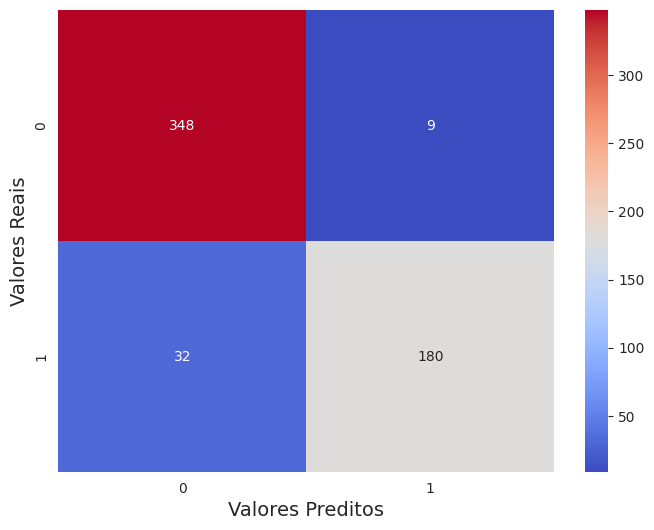

In [ ]:
# # Calcular a matriz de confusão
# cm = confusion_matrix(y_true, y_pred)
# print("Matriz de Confusão:")
# sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
# plt.xlabel('Valores Preditos', fontsize=14)
# plt.ylabel('Valores Reais', fontsize=14)
# # print(cm)
# plt.show()

In [ ]:
# acuracia = accuracy_score(y, y_pred)
# precisao = precision_score(y, y_pred)
# recall = recall_score(y, y_pred)
# f1 = f1_score(y, y_pred)
# print(f"Metricas:")
# print(f'Acuracia: {acuracia*100:.2f}%')
# print(f'Precisao: {precisao*100:.2f}%')
# print(f'Recall: {recall*100:.2f}%')
# print(f'f1-score: {f1*100:.2f}%')

Metricas:
Acuracia: 92.79%
Precisao: 95.24%
Recall: 84.91%
f1-score: 89.78%


- 348 tumores malignos corretamente agrupados (verdadeiros positivos).
- 9 tumores malignos incorretamente agrupados como benignos (falsos negativos).
- 32 tumores benignos incorretamente agrupados como malignos (falsos positivos).
- 180 tumores benignos corretamente agrupados (verdadeiros negativos).

# 4. Visualização dos resultados:
## 4.1) Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade e visualizar os clusters em gráficos.
## 4.2) Visualização dos resultados:
Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade e visualizar os clusters em gráficos.

## Reduzir as Dimensões com PCA
- Como o dataset tem muitas features, será utilizado o método PCA para reduzir os dados para duas dimensões, permitindo que sejam facilmente visualizados em um gráfico.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

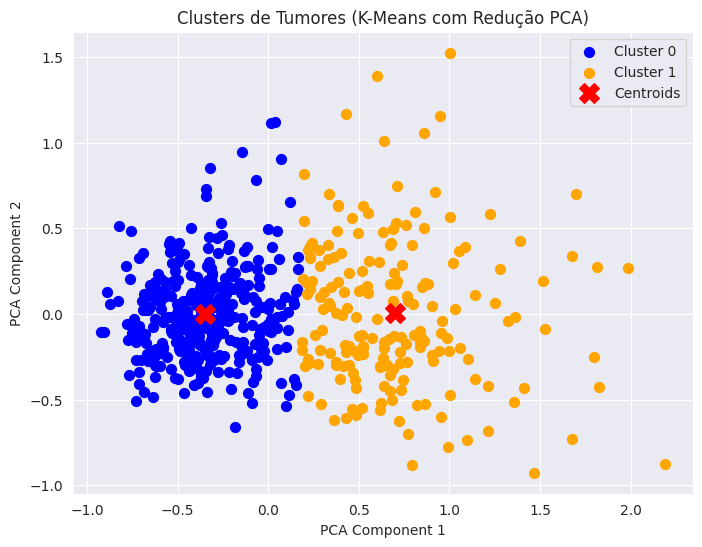

In [ ]:
# Plotar os pontos dos clusters
plt.scatter(X_pca[y_pred == 0, 0],
            X_pca[y_pred == 0, 1],
            s=50,
            c='blue',
            label='Cluster 0')

plt.scatter(X_pca[y_pred == 1, 0],
            X_pca[y_pred == 1, 1],
            s=50,
            c='orange',
            label='Cluster 1')



# Marcar os centróides dos clusters
#Obtém os centróides dos clusters, que representam os pontos médios de cada grupo.
centers = kmeans.cluster_centers_

# Transformar os centróides para a mesma escala do PCA
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0],
            centers_pca[:, 1],
            s=200,
            c='red',
            marker='X',
            label='Centroids')

# Configurar o gráfico
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters de Tumores (K-Means com Redução PCA)')
plt.legend()
plt.show()

# Observações:
## Discutir como os agrupamentos podem ajudar na estratificação dos pacientes e no entendimento dos fatores celulares que influenciam o risco de malignidade.

- A utilização de agrupamentos, como o K-Means, para análise de dados de câncer de mama pode ser uma ferramenta poderosa para estratificar pacientes com base em características celulares e entender melhor os fatores que influenciam o risco de malignidade.

O uso de agrupamentos permite uma análise mais detalhada do perfil celular dos tumores, ajudando a entender como diferentes características celulares se relacionam com a malignidade. Isso fornece uma base para a estratificação de risco dos pacientes, potencializando tanto a precisão dos tratamentos como a eficiência dos recursos de saúde. Além disso, esse tipo de análise permite avançar na pesquisa de câncer, promovendo descobertas de fatores de risco que podem melhorar o diagnóstico e o prognóstico no longo prazo.

# 2. Aplicação do K-Means: k=3

In [ ]:
#Execução do Algoritmo
kmeans = KMeans(
       init='k-means++',
       max_iter=300,
       n_clusters=3,
       n_init=10,
       random_state=0)

# Usar o DataFrame normalizado
kmeans.fit(X_normalized)

#Rótulos dos Clusters: Foram 9 clusters
labels = kmeans.labels_
labels

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
silhouette_avg = silhouette_score(X_normalized, labels)
print(f'Coeficiente de Silhoueta: {silhouette_avg}')

Coeficiente de Silhoueta: 0.3323932440359229


In [ ]:
# Adicionar a coluna de diagnóstico ao DataFrame original
df['cluster'] = labels

In [ ]:
# Visualizar a correspondência entre clusters e diagnóstico real
print(pd.crosstab(df['diagnosis'], df['cluster'], rownames=['Diagnostico Real'], colnames=['Cluster']))

Cluster             0    1   2
Diagnostico Real              
0                 332    0  25
1                  29  113  70


In [ ]:
y_true = df['diagnosis']
y_pred = kmeans.labels_

Matriz de Confusão:


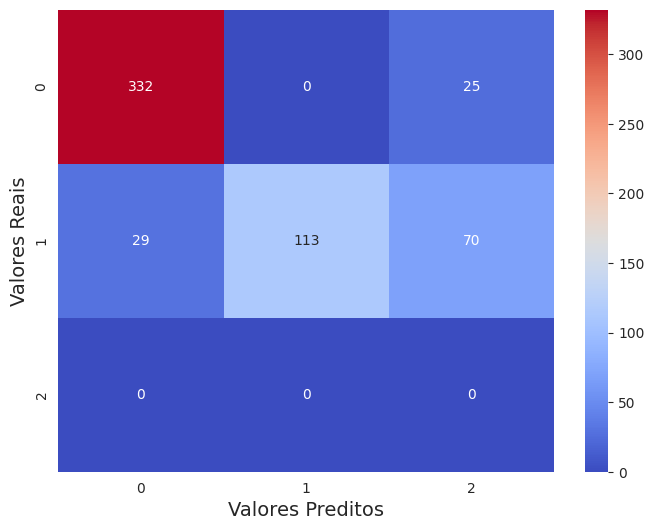

In [ ]:
# # Calcular a matriz de confusão
# cm = confusion_matrix(y_true, y_pred)
# print("Matriz de Confusão:")
# sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
# plt.xlabel('Valores Preditos', fontsize=14)
# plt.ylabel('Valores Reais', fontsize=14)
# # print(cm)
# plt.show()

In [ ]:
# acuracia = accuracy_score(y, y_pred)
# precisao = precision_score(y, y_pred, average='weighted')
# recall = recall_score(y, y_pred, average='weighted')
# f1 = f1_score(y, y_pred, average='weighted')
# print(f"Metricas:")
# print(f'Acuracia: {acuracia*100:.2f}%')
# print(f'Precisao: {precisao*100:.2f}%')
# print(f'Recall: {recall*100:.2f}%')
# print(f'f1-score: {f1*100:.2f}%')

Metricas:
Acuracia: 78.21%
Precisao: 94.96%
Recall: 78.21%
f1-score: 83.93%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

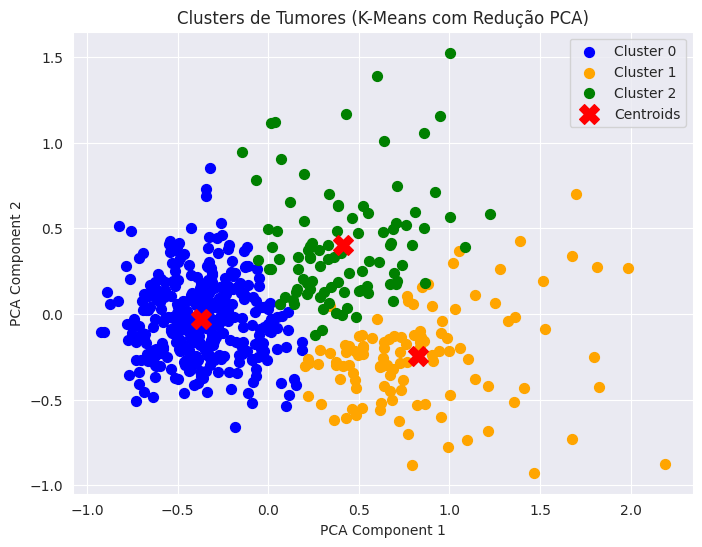

In [ ]:
# Plotar os pontos dos clusters
plt.scatter(X_pca[y_pred == 0, 0],
            X_pca[y_pred == 0, 1],
            s=50,
            c='blue',
            label='Cluster 0')

plt.scatter(X_pca[y_pred == 1, 0],
            X_pca[y_pred == 1, 1],
            s=50,
            c='orange',
            label='Cluster 1')


plt.scatter(X_pca[y_pred == 2, 0],
            X_pca[y_pred == 2, 1],
            s=50,
            c='green',
            label='Cluster 2')

# Marcar os centróides dos clusters
#Obtém os centróides dos clusters, que representam os pontos médios de cada grupo.
centers = kmeans.cluster_centers_

# Transformar os centróides para a mesma escala do PCA
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0],
            centers_pca[:, 1],
            s=200,
            c='red',
            marker='X',
            label='Centroids')

# Configurar o gráfico
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters de Tumores (K-Means com Redução PCA)')
plt.legend()
plt.show()

# Conclusões

## Os resultados mostram que k=2 é uma escolha melhor para o problema de clustering em comparação com k=3, mesmo que o KneeLocator tenha sugerido inicialmente 3 clusters.

- 1. Coeficiente de Silhouette
k=2: O Coeficiente de Silhouette para k=2 é 0.38, que é moderadamente baixo, mas ainda maior que o valor para k=3.
k=3: O Coeficiente de Silhouette para k=3 é 0.33, indicando uma qualidade de separação menor do que para k=2.

- O valor maior para k=2 indica que, mesmo que a qualidade do agrupamento não seja excelente, os dados estão melhor separados com dois clusters do que com três.

- Matriz de Confusão
k=2:
O cluster 0 contém a maioria dos diagnósticos benignos (348 de 357), enquanto o cluster 1 contém a maioria dos diagnósticos malignos (180 de 212), mostrando uma separação razoavelmente boa.
k=3:
O cluster 0 ainda agrupa a maioria dos benignos, mas o cluster 2 começa a misturar benignos e malignos, reduzindo a clareza da separação entre as classes.

-  Para k=3, o terceiro cluster parece introduzir confusão, especialmente para os diagnósticos benignos e malignos, o que indica que a divisão adicional não está agregando valor à separação natural dos dados.

- Métricas de Classificação
k=2:
Acurácia: 92.79%
Precisão: 95.24%
Recall: 84.91%
F1-score: 89.78%

- k=3:
Acurácia: 78.21%
Precisão: 94.96%
Recall: 78.21%
F1-score: 83.93%

- - O agrupamento com k=2 apresenta valores mais altos para acurácia, recall e F1-score. Estes resultados indicam que, com k=2, o modelo está conseguindo capturar melhor os dois tipos de diagnóstico (benigno e maligno), enquanto o terceiro cluster em k=3 reduz a precisão na separação.

# Aplicação do Algoritmo Kmeans executado COM tratamento dos valores discrepantes (outliers) somente para k=2

#Etapa de tratamento de valores discrepantes (Outliers)

## Definir limites de IQR

- O IQR considera os valores fora do intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3) como outliers. Um ponto de corte comum é definir outliers como qualquer valor que esteja abaixo de
𝑄1 − 1.5× IQR ou acima de 𝑄3+1.5×IQR.

In [ ]:
# Definir limites de IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filtrar outliers
df_sem_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Shape antes da remoção: {df.shape}, Shape após remoção: {df_sem_outliers.shape}")

Shape antes da remoção: (569, 33), Shape após remoção: (346, 33)


In [ ]:
y = df_sem_outliers['diagnosis']
X = df_sem_outliers.drop(columns=['diagnosis', 'id'] ,axis=1)

In [ ]:
#Normaliza as variáveis independentes de treino e teste, escalando os valores para um intervalo definido (por padrão, entre 0 e 1)
scaler = MinMaxScaler()

In [ ]:
#ajusta o scaler aos dados de treino, calculando o valor mínimo e o valor máximo de cada feature,
#e aplica a transformação para normalizar os dados dentro do intervalo especificado.
X_normalized_sem_outlier = scaler.fit_transform(X)

In [ ]:
X_normalized_sem_outlier_df = pd.DataFrame(X_normalized_sem_outlier, columns=X.columns)

In [ ]:
X_normalized_sem_outlier_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,0.828055,0.510945,0.806404,0.762006,0.508308,0.527425,0.442829,0.587768,0.485294,0.264352,...,0.548387,0.886197,0.856523,0.590802,0.387182,0.489711,0.759733,0.545842,0.416759,0.5
1,0.664193,0.673134,0.626635,0.556141,0.309384,0.278425,0.129627,0.263940,0.279412,0.248405,...,0.766480,0.632727,0.581625,0.345847,0.209440,0.188818,0.392253,0.496802,0.430065,0.0
2,0.651701,0.708458,0.637273,0.543306,0.340244,0.475636,0.390491,0.426052,0.526316,0.121191,...,0.548387,0.530994,0.416747,0.298921,0.274121,0.300505,0.440031,0.437527,0.087122,0.0
3,0.565729,0.518408,0.541964,0.459839,0.572242,0.309675,0.290570,0.417712,0.324303,0.328136,...,0.661290,0.629278,0.574391,0.611450,0.264930,0.377119,0.632717,0.531343,0.392682,0.0
4,0.481960,0.231343,0.464525,0.359371,0.558316,0.364348,0.261847,0.379746,0.555728,0.272856,...,0.253857,0.424950,0.317097,0.588925,0.247936,0.309305,0.506488,0.509168,0.241090,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.433463,0.955721,0.411765,0.315172,0.296249,0.228696,0.243418,0.186100,0.308824,0.252303,...,0.831697,0.331322,0.247468,0.389019,0.221405,0.315646,0.255328,0.251173,0.238397,0.0
342,0.243148,0.890547,0.232741,0.151211,0.439785,0.336629,0.235717,0.217474,0.329721,0.400780,...,0.802595,0.165187,0.103931,0.536368,0.237012,0.258833,0.358907,0.188913,0.403295,0.0
343,0.559115,0.645274,0.559515,0.436549,0.351638,0.668668,0.404322,0.296743,0.222136,0.407867,...,0.534712,0.478403,0.330540,0.200375,0.490359,0.473923,0.434526,0.202559,0.359100,0.0
344,0.519436,0.867662,0.506223,0.388355,0.582054,0.548611,0.175324,0.341859,0.286378,0.416371,...,0.741585,0.429261,0.314384,0.402159,0.333079,0.171606,0.412112,0.199147,0.409314,0.0


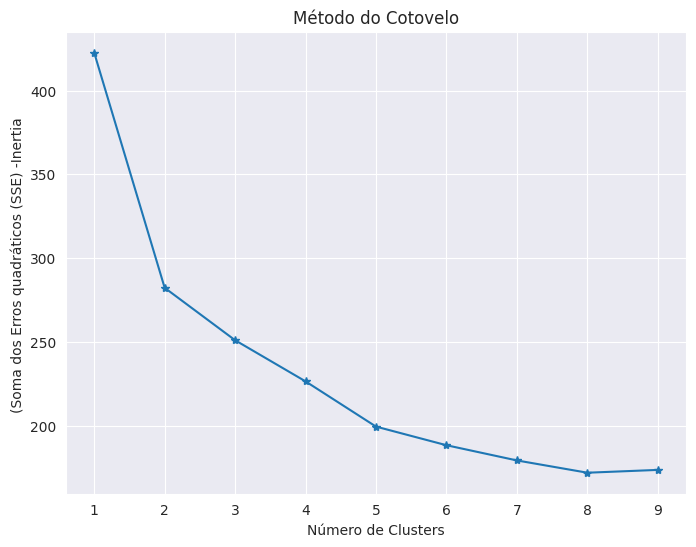

In [ ]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_normalized_sem_outlier)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10),
         inertias,
         marker='*')

plt.xlabel('Número de Clusters')
plt.ylabel('(Soma dos Erros quadráticos (SSE) -Inertia ')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
print(f'Soma dos Erros Quadráticos para cada valor de k: ')
inertias

Soma dos Erros Quadráticos para cada valor de k: 


[422.5693991735348,
 282.26192145959993,
 250.9726557207482,
 226.4157876887682,
 199.42201036717432,
 188.30681360178613,
 179.2309094168957,
 171.90335951446673,
 173.58749072407556]

In [ ]:
#Execução do Algoritmo
kmeans = KMeans(
       init='k-means++',
       max_iter=300,
       n_clusters=2,
       n_init=10,
       random_state=0)

In [ ]:
# Usar o DataFrame normalizado
kmeans.fit(X_normalized_sem_outlier)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
#Rótulos dos Clusters: Foram 9 clusters
labels = kmeans.labels_
labels


array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
silhouette_avg = silhouette_score(X_normalized_sem_outlier, labels)
print(f'Coeficiente de Silhoueta: {silhouette_avg}')


Coeficiente de Silhoueta: 0.38472449328090713


In [ ]:
# Adicionar a coluna de diagnóstico ao DataFrame original
df_sem_outliers['cluster'] = labels

<ipython-input-97-410df843b8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['cluster'] = labels


In [ ]:
df_sem_outliers['diagnosis']

,diagnosis
6,1
10,1
13,1
16,1
19,0
...,...
554,0
555,0
558,0
560,0


In [ ]:
# Visualizar a correspondência entre clusters e diagnóstico real
print(pd.crosstab(df_sem_outliers['diagnosis'], df_sem_outliers['cluster'], rownames=['Diagnostico Real'], colnames=['Cluster']))

Cluster             0   1
Diagnostico Real         
0                 253  10
1                  19  64


In [ ]:
y_true_sem_out = df_sem_outliers['diagnosis']
y_pred_sem_out = kmeans.labels_

Matriz de Confusão:


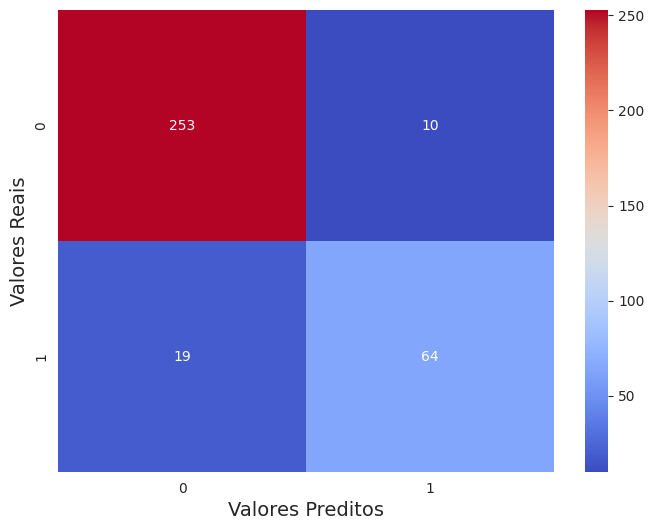

In [ ]:
# # Calcular a matriz de confusão
# cm = confusion_matrix(y_true_sem_out, y_pred_sem_out)
# print("Matriz de Confusão:")
# sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
# plt.xlabel('Valores Preditos', fontsize=14)
# plt.ylabel('Valores Reais', fontsize=14)
# # print(cm)
# plt.show()

In [ ]:
# acuracia = accuracy_score(y_true_sem_out, y_pred_sem_out)
# precisao = precision_score(y_true_sem_out, y_pred_sem_out)
# recall = recall_score(y_true_sem_out, y_pred_sem_out)
# f1 = f1_score(y_true_sem_out, y_pred_sem_out)
# print(f"Metricas:")
# print(f'Acuracia: {acuracia*100:.2f}%')
# print(f'Precisao: {precisao*100:.2f}%')
# print(f'Recall: {recall*100:.2f}%')
# print(f'f1-score: {f1*100:.2f}%')

Metricas:
Acuracia: 91.62%
Precisao: 86.49%
Recall: 77.11%
f1-score: 81.53%


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized_sem_outlier)

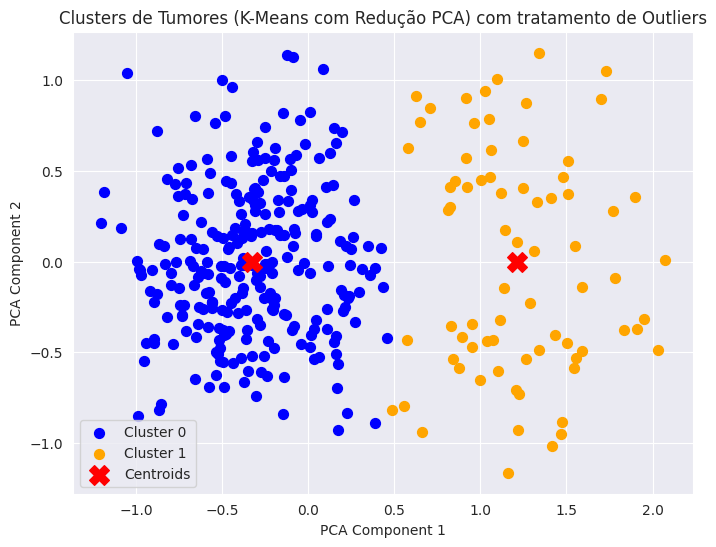

In [ ]:
# Plotar os pontos dos clusters
plt.scatter(X_pca[y_pred_sem_out == 0, 0],
            X_pca[y_pred_sem_out == 0, 1],
            s=50,
            c='blue',
            label='Cluster 0')

plt.scatter(X_pca[y_pred_sem_out == 1, 0],
            X_pca[y_pred_sem_out == 1, 1],
            s=50,
            c='orange',
            label='Cluster 1')

# Marcar os centróides dos clusters
#Obtém os centróides dos clusters, que representam os pontos médios de cada grupo.
centers = kmeans.cluster_centers_

# Transformar os centróides para a mesma escala do PCA
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0],
            centers_pca[:, 1],
            s=200,
            c='red',
            marker='X',
            label='Centroids')

# Configurar o gráfico
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters de Tumores (K-Means com Redução PCA) com tratamento de Outliers')
plt.legend()
plt.show()

# É possível perceber que os cluster ficaram mais bem separados